In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Esempio: L'Auguste Piccard PX-8

**L'attrattiva principale dell'Expo 1964 fu un sottomarino**

<center>
<img src="assets/piccard.jpg" width=60%/>
</center>

* Faceva immersioni con passeggeri nel Lago di Ginevra

## Esempio: L'Auguste Piccard PX-8

**Per muoversi in verticale un sottomarino carica/scarica acqua**

In questo modo esso varia la sua densità

* Se la densità è maggiore di $\rho$, il sottomarino "cade" nel fluido
* Se è minore, il sottomarino "cade" verso l'alto
* Se è uguale, il sottomarino si muove per inerzia

Per precisione, il sottomarino è soggetto a tre forze principali:

* La forza di gravità, che lo accelera verso il basso
* La forza di galleggiamento, che lo accelera verso l'alto
* L'attrito aerodinamico dell'acqua (trascinamento)

## Esempio: L'Auguste Piccard PX-8

**La _forza di gravità_ è data da (asse cartesiano orientato verso l'alto):**

$$
F_g = -g (m + \rho L)
$$

* $L$ il volume dell'acqua a bordo
* $m$ è la massa del sottomarino
* $g$ è l'accelarazione di gravità
* $\rho$ è la densità dell'acqua

**La _forza di galleggiameto_ è data da (principio di Archimede):**

$$
F_b = g \rho V
$$

* $V$ è il volume del sottomarino

## Esempio: L'Auguste Piccard PX-8

**L'attrito aerodinamico dell'acqua (_trascinamento_) è dato da:**

$$
F_t = -\frac{1}{2} \rho A C_D\, v |v|
$$

* $A$ è l'area della sezione
* $C_D$ è un coefficiente che dipende dalla forma
* $v$ è la velocità
  * Il prodotto $v |v|$ ha lo stesso segno di $v$...
  * ...ed il valore assoluto di $v^2$


## Esempio: L'Auguste Piccard PX-8

**Supponiamo che l'acqua a bordo vari nel modo seguente:**

<center>
<img src="assets/piccard_load.png" width=40%/>
</center>

Il valore $L \simeq 52.2$ bilancia le forze di gravità e galleggiamento

* Si tratta di una funzione lineare a tratti
* ...E quindi valutabile con `numpy.interp`

## Esempio: L'Auguste Piccard PX-8

**La quota del PX-8 nel tempo è regolata dall'ODE:**

$$
\ddot{x} = \frac{1}{m + \rho L} (F_g + F_b + F_t)
$$

Che può essere riscritta come:

$$
\left(\begin{array}{c}
\dot{x} \\
\dot{v} \\
\end{array}\right)
=
\left(\begin{array}{c}
v \\
\frac{1}{m + \rho L} (F_g + F_b + F_t) \\
\end{array}\right)
$$


* La quota iniziale $x_0$ è $-5\, m$
* In particolare, vogliamo sapere la quota dopo 10, 20 e 30 minuti
* ...Ma ci arriveremo per gradi

## Esempio: L'Auguste Piccard PX-8

**Prima di tutto recuperiamo i dati del problema**

...Possiamo farlo eseguendo questa cella:

In [33]:
import numpy as np

g = 9.81
D = 3.5
H = 28.5
V = np.pi * (D/2)**2 * H # Volume
A = D * H * 1.8
Cd = 0.47
m = 222e3 # Massa
rho = 1000 # Densita' dell'acqua
L0 = V - m / rho # Volume d'acqua iniziale (m^2)

Tp = [     0,     10, 20, 180,      190, 200, 1800];
Lp = [L0+0.3, L0+0.3, L0,  L0, L0-0.085,  L0,   L0];

## Esempio: L'Auguste Piccard PX-8

**Nel modulo `sol.piccard` si definisca una classe:**

```python
class PX8Dstate:
    def __init__(self, m, g, rho, V, A, Cd, Tp, Lp):
        ...

    def __call__(self, X, t):
        ...
```

...Che rappresenti la funzione che definisce l'ODE

* Il metodo `__call__` deve calcolare le derivate
* ...Recuparando il valore di $L$ per il tempo corrente interpolando `Tp` e `Lp`
* ...E restiuirle sotto forma di `numpy.array`

Nella cella seguente:

* Si utilizzi la classe per calcolare il gradiente
* ...Per lo stato iniziale $(x_0, v_0) = (-5, 0)$ ed il tempo iniziale $t_0 = 0$

In [39]:
from sol import piccard

X0 = np.array([-5, 0])
t0 = 0

dstate = piccard.PX8Dstate(m, g, rho, V, A, Cd, Tp, Lp)
dstate(X=X0, t=t0)

array([ 0.        , -0.01072123])

## Esempio: L'Auguste Piccard PX-8

**Nel modulo `sol.piccard` si definisca una funzione:**

```python
def simulate(f, X0, t)
```

...Che si simuli il comportamento del sommergibile

* La funzione deve restituire una tupla contenente (nell'ordine):
  - La matrice con gli stati visitati
  - Il vettore con i valori del tempo
* La funzione deve anche disegnare un grafico utilizzando `example.util.plot_state_evolution`

**Si utilizzi la funzione per determinare il comportamento del sommergibile**

* Per un periodo di 30'
* ...A partire dallo stato iniziale $(x, v) = (-5, 0)$

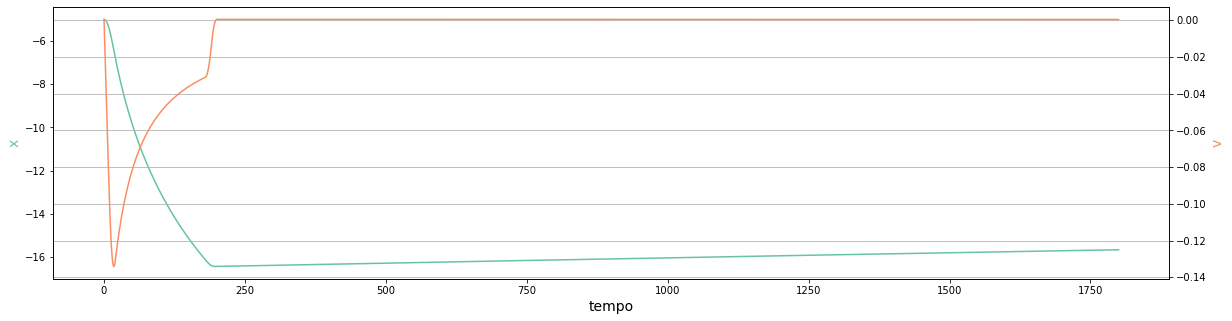

In [40]:
from scipy.integrate import odeint
from example import util

X0 = np.array([-5, 0])
t = np.linspace(0, 1800, 1800)

X, t = piccard.simulate(dstate, X0, t)

## Esempio: L'Auguste Piccard PX-8

**Nel modulo `sol.piccard` si definisca una funzione:**

```python
def get_depth(X, t)
```

* Che restituisca una tupla contentente (nell'ordine):
  - La quota del sommergibile a 10 minuti
  - La quota del sommergibile a 20 minuti
  - La quota del sommergibile a 30 minuti

Si stampino a video i tre valori

In [41]:
q10, q20, q30 = piccard.get_depth(X, t)

print(f'Quota a 10 minuti: {q10}')
print(f'Quota a 20 minuti: {q20}')
print(f'Quota a 30 minuti: {q30}')

Quota a 10 minuti: -5.521979798233806
Quota a 20 minuti: -6.782342264263152
Quota a 30 minuti: -6.782342264263152
